In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [49]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [50]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [51]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [52]:
df.reset_index(drop=True,inplace=True)

In [53]:
df.drop(all_indices,axis=0,inplace= True)

In [54]:
df.reset_index(drop=True,inplace=True)

In [55]:
df['sqft_lot'].describe()

count     18208.000000
mean      10667.345837
std       13456.398524
min         520.000000
25%        5000.000000
50%        7480.000000
75%       10187.500000
max      137214.000000
Name: sqft_lot, dtype: float64

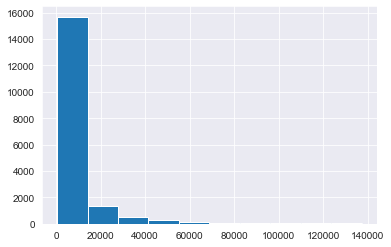

In [56]:
df['sqft_lot'].hist()

In [57]:
df = df.loc[df['sqft_lot']<25000]

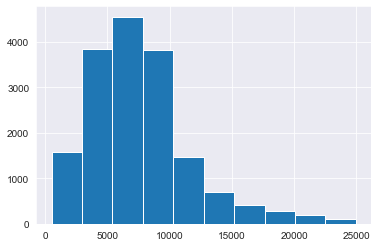

In [58]:
df['sqft_lot'].hist()

In [59]:
df.shape

(16940, 19)

In [60]:
# df = df.loc[df['condition']>=3]

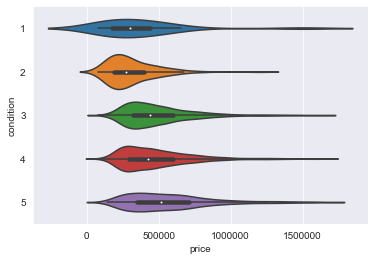

In [61]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [10]:
df = df.round({'bathrooms':0})

In [11]:
df['cond1'] = df.condition.apply(lambda x: 1 if x ==1 else 0)
df['cond2'] = df.condition.apply(lambda x: 1 if x ==2 else 0)
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

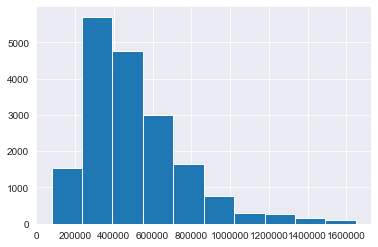

In [12]:
df['price'].hist()

In [62]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

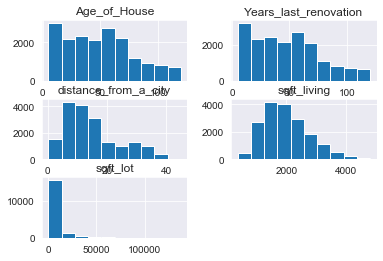

In [14]:
df[features].hist();

In [15]:
df.shape

(18208, 24)

In [42]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [17]:
tobox = ['distance_from_a_city','sqft_lot','sqft_living',]

In [43]:
for feat in tobox:
    df[feat]= np.log(df[feat])


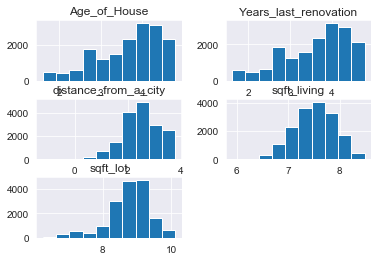

In [46]:
df[features].hist();

In [63]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [21]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [22]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [64]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','grade']


In [65]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [25]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [26]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond1',
       'cond2', 'cond3', 'cond4', 'cond5', 'bedbath', 'livinglot'],
      dtype='object')

In [27]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [73]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'basement','grade']
outcome = ['price']

In [74]:
# for col in x_cols:
#     sns.jointplot(x = col,y ='price',data=df, kind='reg')

In [75]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [76]:
X = df[x_cols]
y = df['price']

In [77]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              1906.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:58:11   Log-Likelihood:                     -2.4275e+05
No. Observations:               16940   AIC:                                  4.855e+05
Df Residuals:                   16932   BIC:                                  4.856e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.842e+04   4079.245     -4.517      0.000   -2.64e+04   -1.04e+04
bathrooms            -3.206e+04   5272.940     -6.080      0.000   -4.24e+04   -2.17e+04
sqft_living           3.113e+04   6119.346      5.088      0.000    1.91e+04    4.31e+04
sqft_lot              1.465e+04   3468.238      4.225      0.000    7855.309    2.15e+04
distance_from_a_city -5.342e+04   3628.537    -14.723      0.000   -6.05e+04   -4.63e+04
Age_of_House         -7454.8083   4305.514     -1.731      0.083   -1.59e+04     984.448
basement               5.39e+05   5257.663    102.520      0.000    5.29e+05    5.49e+05
grade                 1.487e+05   5047.735     29.457      0.000    1.39e+05    1.59e+05
==============================================================================
Omnibus:                      312.942   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.823
Skew:                          -0.193   Prob(JB):                     2.77e-51
Kurtosis:                       2.575   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.906e+04,1348.329,-14.136,0.0,-2.17e+04,-1.64e+04
bathrooms,2.168e+04,1424.525,15.219,0.0,1.89e+04,2.45e+04
sqft_living,9.267e+04,2020.596,45.862,0.0,8.87e+04,9.66e+04
sqft_lot,2.488e+04,1226.310,20.290,0.0,2.25e+04,2.73e+04
distance_from_a_city,-1.154e+05,1255.491,-91.941,0.0,-1.18e+05,-1.13e+05


In [34]:
X = df[x_cols]
y= df['price']

In [35]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3850.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:55:23   Log-Likelihood:            -2.4104e+05
No. Observations:               18208   AIC:                         4.821e+05
Df Residuals:                   18195   BIC:                         4.822e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.906e+04   1348.329    -14.136      0.000   -2.17e+04   -1.64e+04
bathrooms             2.168e+04   1424.525     15.219      0.000    1.89e+04    2.45e+04
sqft_living           9.267e+04   2020.596     45.862      0.000    8.87e+04    9.66e+04
sqft_lot              2.488e+04   1226.310     20.290      0.000    2.25e+04    2.73e+04
distance_from_a_city -1.154e+05   1255.491    -91.941      0.000   -1.18e+05   -1.13e+05
Age_of_House          3.522e+04   1426.804     24.685      0.000    3.24e+04     3.8e+04
basement             -2.672e+04   2317.850    -11.528      0.000   -3.13e+04   -2.22e+04
grade                 1.023e+05   1644.943     62.161      0.000     9.9e+04    1.05e+05
cond1                 5.113e+05   2.78e+04     18.377      0.000    4.57e+05    5.66e+05
cond2                 4.784e+05   1.15e+04     41.539      0.000    4.56e+05    5.01e+05
cond3                  5.07e+05   1543.729    328.416      0.000    5.04e+05     5.1e+05
cond4                 5.189e+05   2259.076    229.697      0.000    5.14e+05    5.23e+05
cond5                 5.571e+05   3869.952    143.946      0.000    5.49e+05    5.65e+05
==============================================================================
Omnibus:                     3796.048   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13586.096
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       6.703   Cond. No.                         48.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.792908362903277),
 ('bathrooms', 2.00127544368804),
 ('sqft_living', 4.026477323067299),
 ('sqft_lot', 1.4830892397232596),
 ('distance_from_a_city', 1.554510325191203),
 ('Age_of_House', 2.007683012520421),
 ('basement', 1.2510464186062193),
 ('grade', 2.6685046052713046),
 ('cond1', 1.0064935583377557),
 ('cond2', 1.0200731747108114),
 ('cond3', 1.5235698720031383),
 ('cond4', 1.3340652284743104),
 ('cond5', 1.1462555870203839)]

In [37]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

13 13


In [38]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3850.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:55:25   Log-Likelihood:            -2.4104e+05
No. Observations:               18208   AIC:                         4.821e+05
Df Residuals:                   18195   BIC:                         4.822e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.906e+04   1348.329    -14.136      0.000   -2.17e+04   -1.64e+04
bathrooms             2.168e+04   1424.525     15.219      0.000    1.89e+04    2.45e+04
sqft_living           9.267e+04   2020.596     45.862      0.000    8.87e+04    9.66e+04
sqft_lot              2.488e+04   1226.310     20.290      0.000    2.25e+04    2.73e+04
distance_from_a_city -1.154e+05   1255.491    -91.941      0.000   -1.18e+05   -1.13e+05
Age_of_House          3.522e+04   1426.804     24.685      0.000    3.24e+04     3.8e+04
basement             -2.672e+04   2317.850    -11.528      0.000   -3.13e+04   -2.22e+04
grade                 1.023e+05   1644.943     62.161      0.000     9.9e+04    1.05e+05
cond1                 5.113e+05   2.78e+04     18.377      0.000    4.57e+05    5.66e+05
cond2                 4.784e+05   1.15e+04     41.539      0.000    4.56e+05    5.01e+05
cond3                  5.07e+05   1543.729    328.416      0.000    5.04e+05     5.1e+05
cond4                 5.189e+05   2259.076    229.697      0.000    5.14e+05    5.23e+05
cond5                 5.571e+05   3869.952    143.946      0.000    5.49e+05    5.65e+05
==============================================================================
Omnibus:                     3796.048   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13586.096
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       6.703   Cond. No.                         48.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3850.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:55:26   Log-Likelihood:            -2.4104e+05
No. Observations:               18208   AIC:                         4.821e+05
Df Residuals:                   18195   BIC:                         4.822e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.906e+04   1348.329    -14.136      0.000   -2.17e+04   -1.64e+04
bathrooms             2.168e+04   1424.525     15.219      0.000    1.89e+04    2.45e+04
sqft_living           9.267e+04   2020.596     45.862      0.000    8.87e+04    9.66e+04
sqft_lot              2.488e+04   1226.310     20.290      0.000    2.25e+04    2.73e+04
distance_from_a_city -1.154e+05   1255.491    -91.941      0.000   -1.18e+05   -1.13e+05
Age_of_House          3.522e+04   1426.804     24.685      0.000    3.24e+04     3.8e+04
basement             -2.672e+04   2317.850    -11.528      0.000   -3.13e+04   -2.22e+04
grade                 1.023e+05   1644.943     62.161      0.000     9.9e+04    1.05e+05
cond1                 5.113e+05   2.78e+04     18.377      0.000    4.57e+05    5.66e+05
cond2                 4.784e+05   1.15e+04     41.539      0.000    4.56e+05    5.01e+05
cond3                  5.07e+05   1543.729    328.416      0.000    5.04e+05     5.1e+05
cond4                 5.189e+05   2259.076    229.697      0.000    5.14e+05    5.23e+05
cond5                 5.571e+05   3869.952    143.946      0.000    5.49e+05    5.65e+05
==============================================================================
Omnibus:                     3796.048   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13586.096
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       6.703   Cond. No.                         48.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

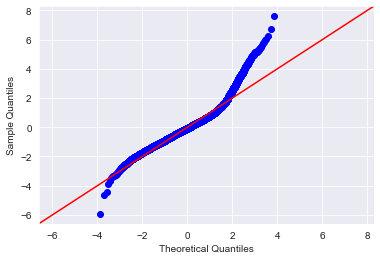

In [40]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


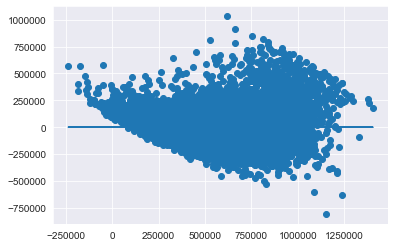

In [41]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

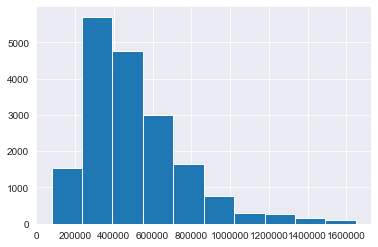

In [42]:
df.price.hist()

In [43]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [52]:
orig_tot = len(df)
df = df[df.price < 1200000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.027240773286467488


In [53]:
X = df[x_cols]
y = df['price']

In [54]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     3628.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:56:02   Log-Likelihood:            -2.3137e+05
No. Observations:               17712   AIC:                         4.628e+05
Df Residuals:                   17699   BIC:                         4.629e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.64e+04   1151.558    -14.238      0.000   -1.87e+04   -1.41e+04
bathrooms             1.395e+04   1234.995     11.293      0.000    1.15e+04    1.64e+04
sqft_living           8.901e+04   1723.374     51.648      0.000    8.56e+04    9.24e+04
sqft_lot                2.1e+04   1047.343     20.051      0.000    1.89e+04    2.31e+04
distance_from_a_city -1.049e+05   1084.877    -96.683      0.000   -1.07e+05   -1.03e+05
Age_of_House          2.687e+04   1231.075     21.823      0.000    2.45e+04    2.93e+04
basement             -2.706e+04   1974.455    -13.705      0.000   -3.09e+04   -2.32e+04
grade                 8.359e+04   1435.007     58.248      0.000    8.08e+04    8.64e+04
cond1                 4.589e+05   2.39e+04     19.235      0.000    4.12e+05    5.06e+05
cond2                 4.555e+05   9703.338     46.946      0.000    4.37e+05    4.75e+05
cond3                 4.955e+05   1313.746    377.196      0.000    4.93e+05    4.98e+05
cond4                 5.051e+05   1923.302    262.632      0.000    5.01e+05    5.09e+05
cond5                 5.385e+05   3321.873    162.096      0.000    5.32e+05    5.45e+05
==============================================================================
Omnibus:                     1192.706   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2287.418
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       4.472   Cond. No.                         47.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 13
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.64e+04,1151.558,-14.238,0.0,-1.87e+04,-1.41e+04
bathrooms,1.395e+04,1234.995,11.293,0.0,1.15e+04,1.64e+04
sqft_living,8.901e+04,1723.374,51.648,0.0,8.56e+04,9.24e+04
sqft_lot,2.1e+04,1047.343,20.051,0.0,1.89e+04,2.31e+04
distance_from_a_city,-1.049e+05,1084.877,-96.683,0.0,-1.07e+05,-1.03e+05


In [56]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     3628.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:56:04   Log-Likelihood:            -2.3137e+05
No. Observations:               17712   AIC:                         4.628e+05
Df Residuals:                   17699   BIC:                         4.629e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              -1.64e+04   1151.558    -14.238      0.000   -1.87e+04   -1.41e+04
bathrooms             1.395e+04   1234.995     11.293      0.000    1.15e+04    1.64e+04
sqft_living           8.901e+04   1723.374     51.648      0.000    8.56e+04    9.24e+04
sqft_lot                2.1e+04   1047.343     20.051      0.000    1.89e+04    2.31e+04
distance_from_a_city -1.049e+05   1084.877    -96.683      0.000   -1.07e+05   -1.03e+05
Age_of_House          2.687e+04   1231.075     21.823      0.000    2.45e+04    2.93e+04
basement             -2.706e+04   1974.455    -13.705      0.000   -3.09e+04   -2.32e+04
grade                 8.359e+04   1435.007     58.248      0.000    8.08e+04    8.64e+04
cond1                 4.589e+05   2.39e+04     19.235      0.000    4.12e+05    5.06e+05
cond2                 4.555e+05   9703.338     46.946      0.000    4.37e+05    4.75e+05
cond3                 4.955e+05   1313.746    377.196      0.000    4.93e+05    4.98e+05
cond4                 5.051e+05   1923.302    262.632      0.000    5.01e+05    5.09e+05
cond5                 5.385e+05   3321.873    162.096      0.000    5.32e+05    5.45e+05
==============================================================================
Omnibus:                     1192.706   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2287.418
Skew:                           0.483   Prob(JB):                         0.00
Kurtosis:                       4.472   Cond. No.                         47.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7870942176273228),
 ('bathrooms', 1.948826647330152),
 ('sqft_living', 3.8840065658797562),
 ('sqft_lot', 1.4958948925027973),
 ('distance_from_a_city', 1.5516645235419793),
 ('Age_of_House', 2.0492559517544837),
 ('basement', 1.245698017482373),
 ('grade', 2.5487096553389597),
 ('cond1', 1.0067557353547105),
 ('cond2', 1.0211462873792325),
 ('cond3', 1.5262785294973604),
 ('cond4', 1.3392618850717029),
 ('cond5', 1.1407533516191968)]

In [58]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

13 13


In [356]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3651.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:33:53   Log-Likelihood:            -2.2874e+05
No. Observations:               17539   AIC:                         4.575e+05
Df Residuals:                   17527   BIC:                         4.576e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.204e+04   1103.571    -10.907      0.000   -1.42e+04   -9873.501
bathrooms             3433.8887   1171.459      2.931      0.003    1137.713    5730.064
sqft_living           9.585e+04   1640.443     58.427      0.000    9.26e+04    9.91e+04
sqft_lot              1.464e+04    909.539     16.095      0.000    1.29e+04    1.64e+04
distance_from_a_city -1.011e+05    901.381   -112.145      0.000   -1.03e+05   -9.93e+04
basement             -1.415e+04   1887.348     -7.497      0.000   -1.78e+04   -1.05e+04
grade                 6.751e+04   1347.129     50.115      0.000    6.49e+04    7.02e+04
cond1                  4.65e+05   2.34e+04     19.904      0.000    4.19e+05    5.11e+05
cond2                 4.474e+05   9496.065     47.115      0.000    4.29e+05    4.66e+05
cond3                 4.793e+05   1240.390    386.391      0.000    4.77e+05    4.82e+05
cond4                   5.1e+05   1870.346    272.686      0.000    5.06e+05    5.14e+05
cond5                  5.44e+05   3241.242    167.835      0.000    5.38e+05     5.5e+05
==============================================================================
Omnibus:                     1104.488   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1693.203
Skew:                           0.526   Prob(JB):                         0.00
Kurtosis:                       4.101   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

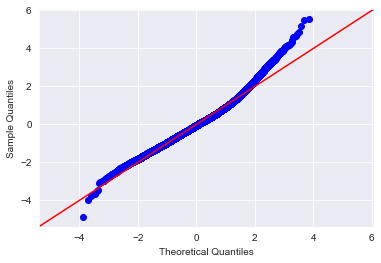

In [357]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


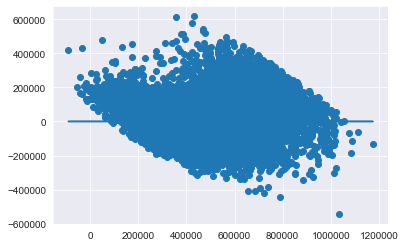

In [358]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 650000.0
0.81 percentile: 661000.0
0.82 percentile: 675000.0
0.83 percentile: 686000.0
0.84 percentile: 700000.0
0.85 percentile: 712000.0
0.86 percentile: 725000.0
0.87 percentile: 740000.0
0.88 percentile: 750840.0000000001
0.89 percentile: 770000.0
0.9 percentile: 785000.0
0.91 percentile: 800000.0
0.92 percentile: 825000.0
0.93 percentile: 845000.0
0.94 percentile: 865000.0
0.95 percentile: 895000.0
0.96 percentile: 925000.0
0.97 percentile: 962933.9999999997
0.98 percentile: 1000000.0
0.99 percentile: 1090000.0


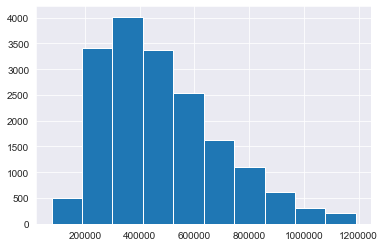

In [63]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [64]:
df = df[df.price <= 950000.0]


In [65]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     3175.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:56:46   Log-Likelihood:            -2.2232e+05
No. Observations:               17137   AIC:                         4.447e+05
Df Residuals:                   17124   BIC:                         4.448e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.547e+04   1075.075    -14.394      0.000   -1.76e+04   -1.34e+04
bathrooms             9196.1371   1172.507      7.843      0.000    6897.903    1.15e+04
sqft_living           8.547e+04   1604.358     53.274      0.000    8.23e+04    8.86e+04
sqft_lot              1.868e+04    979.319     19.078      0.000    1.68e+04    2.06e+04
distance_from_a_city -9.903e+04   1021.064    -96.987      0.000   -1.01e+05    -9.7e+04
Age_of_House           2.17e+04   1157.913     18.744      0.000    1.94e+04     2.4e+04
basement             -2.632e+04   1836.485    -14.329      0.000   -2.99e+04   -2.27e+04
grade                 7.351e+04   1368.981     53.699      0.000    7.08e+04    7.62e+04
cond1                 4.447e+05   2.18e+04     20.384      0.000    4.02e+05    4.87e+05
cond2                 4.437e+05   8878.385     49.974      0.000    4.26e+05    4.61e+05
cond3                  4.86e+05   1225.988    396.453      0.000    4.84e+05    4.88e+05
cond4                 4.953e+05   1790.452    276.614      0.000    4.92e+05    4.99e+05
cond5                 5.231e+05   3126.817    167.290      0.000    5.17e+05    5.29e+05
==============================================================================
Omnibus:                      428.418   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.345
Skew:                           0.278   Prob(JB):                    1.07e-133
Kurtosis:                       3.740   Cond. No.                         45.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

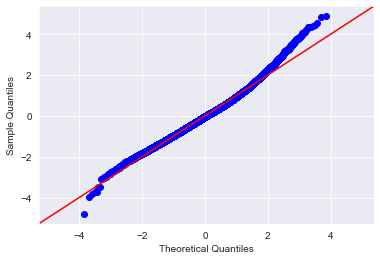

In [362]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


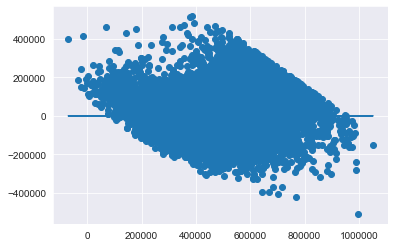

In [363]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [44]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [45]:
residuals = model.resid

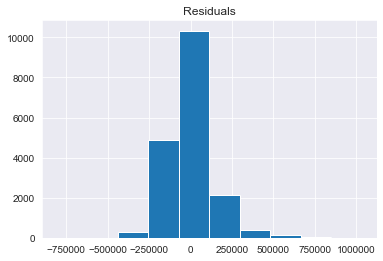

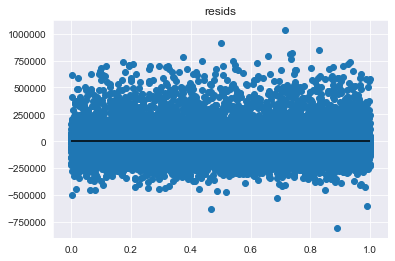

In [46]:
plot_residuals(residuals)

In [47]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [66]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [67]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6874208982080916, 0.6859829465937584, 0.6859456764999668)

In [68]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-10918778996.664051, -10924490313.41818, -10907881449.497967)

In [69]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-81607.1507925735, -81617.8327921354, -81552.2724648196)

In [70]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6891736527154348

In [71]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [75]:
make_ols_sklearn(X, y)

train R2 score = 0.6917112302088482
test R2 score = 0.6826224889267676
cv5 R2 score = 0.6874208982080916
cv10 R2 score = 0.6859829465937584
cv5 MSE score = -10918778996.664051
cv10  MSE score = -10924490313.418186


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [76]:
make_ols_sklearn(X, y)

train R2 score = 0.6879816745551228
test R2 score = 0.6973736964785466
cv5 R2 score = 0.6874208982080916
cv10 R2 score = 0.6859829465937584
cv5 MSE score = -10918778996.664051
cv10  MSE score = -10924490313.418186


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [77]:
residuals = model.resid

In [78]:
resid = pd.DataFrame(df['price'])

In [79]:
resid['residuals']  = residuals

In [80]:
resid

,price,residuals
0,538000.0,32120.382928
1,180000.0,-33492.001487
2,604000.0,117223.937779
3,510000.0,13380.538664
5,257500.0,-12279.709365
...,...,...
19216,475000.0,30390.407982
19217,360000.0,-74202.965722
19218,400000.0,-127662.023854
19219,402101.0,-61140.070817


In [81]:
import seaborn as sns

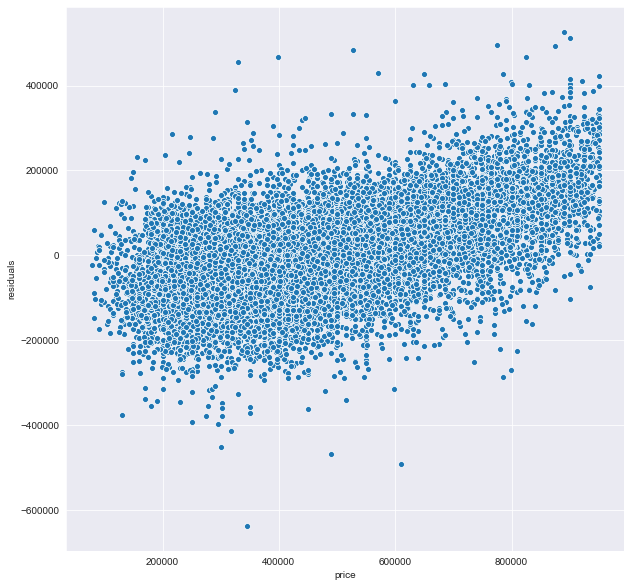

In [82]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [83]:
X_shuff, y_shuff = shuffle(X, y)

In [84]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6892645211693073

In [85]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6894107459876817

In [86]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6893420936615652

In [189]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white